<a href="https://colab.research.google.com/github/nikhilbansal23/Marketing-Campaign-Results/blob/main/Marketing_Campaign_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Freedom Debt Relief’s customers are people who have a substantial amount of debt and because of an unexpected hardship, are no longer able to make their minimum monthly payments. Upon enrolling in Freedom’s Debt Relief program, customers cease making payments to their creditors and instead make deposits they can afford into a new dedicated bank account with Freedom. Freedom uses these funds to negotiate with each of the client’s creditors to settle the debt, typically at only a fraction of what was originally owed. Once a settlement has been agreed upon for an individual account, Freedom facilitates payments from the dedicated bank account to the creditor based on the terms of the settlement agreement. Freedom then collects fees from the client for the individual account that was settled. Freedom earns fees for each account it successfully negotiates a settlement agreement. The number of settlement agreements Freedom can negotiate is proportional to the monthly deposited amount. Assume industry statistics for any analysis input that you would want to use that is not provided here, including but not limited to fee percentage Freedom would collect along with ongoing cost per client between initial enrollment and program graduation.

Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

Using the three datasets given:



*   Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?
*   Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?
*   How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.





**Assume the following:**

There is no seasonality in the results, and the campaign spend was distributed evenly across Month 3 (i.e., spend on the first day is the same as spend on the last day).
Channel mix, targeting, and efficiency are outside the scope of this exercise, but you may address it after answering the 3 questions.
There may be data provided that is not useful in your analysis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

In [3]:
calendar_data = pd.read_csv("/content/drive/MyDrive/Datasets/Marketing Campaign Results/calendar_data.csv")
client_data = pd.read_csv("/content/drive/MyDrive/Datasets/Marketing Campaign Results/client_data.csv")
deposit_data = pd.read_csv("/content/drive/MyDrive/Datasets/Marketing Campaign Results/deposit_data.csv")

In [4]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46347 entries, 0 to 46346
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   client_id                   46347 non-null  int64 
 1   client_geographical_region  46347 non-null  object
 2   client_residence_status     46347 non-null  object
 3   client_age                  46347 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [5]:
client_data.shape

(46347, 4)

In [6]:
deposit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        480394 non-null  int64  
 1   deposit_type     480394 non-null  object 
 2   deposit_amount   480394 non-null  float64
 3   deposit_cadence  480394 non-null  object 
 4   deposit_date     480394 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.3+ MB


In [7]:
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gregorian_date  153 non-null    object
 1   month_name      153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [8]:
# calendar_data

In [9]:
result = pd.merge(client_data, deposit_data, on='client_id')

In [10]:
result.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01


In [11]:
result.isnull().sum()

client_id                     0
client_geographical_region    0
client_residence_status       0
client_age                    0
deposit_type                  0
deposit_amount                0
deposit_cadence               0
deposit_date                  0
dtype: int64

In [12]:
# final_df = pd.merge(result, calendar_data, on=["deposit_date", "gregorian_date"], how='left')
df = result.merge(calendar_data, left_on="deposit_date", right_on="gregorian_date", copy=False)

In [13]:
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2
...,...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,2019-07-20,Month 2
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,2019-07-20,Month 2
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,2019-07-20,Month 2
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,2019-07-20,Month 2


In [14]:
df.drop(columns="gregorian_date", inplace=True)

In [15]:
df["client_geographical_region"].value_counts()

West         205629
South        108004
Midwest       88185
Northeast     78576
Name: client_geographical_region, dtype: int64

In [16]:
df["client_residence_status"].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [17]:
df["client_age"].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

In [18]:
df["deposit_type"].value_counts()

Scheduled Deposit    247986
Actual Deposit       232408
Name: deposit_type, dtype: int64

In [19]:
df["deposit_cadence"].value_counts()

Monthly     262858
Biweekly    209189
Extra         8347
Name: deposit_cadence, dtype: int64

In [20]:
df["deposit_date"] = pd.to_datetime(df["deposit_date"])

In [21]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 7)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


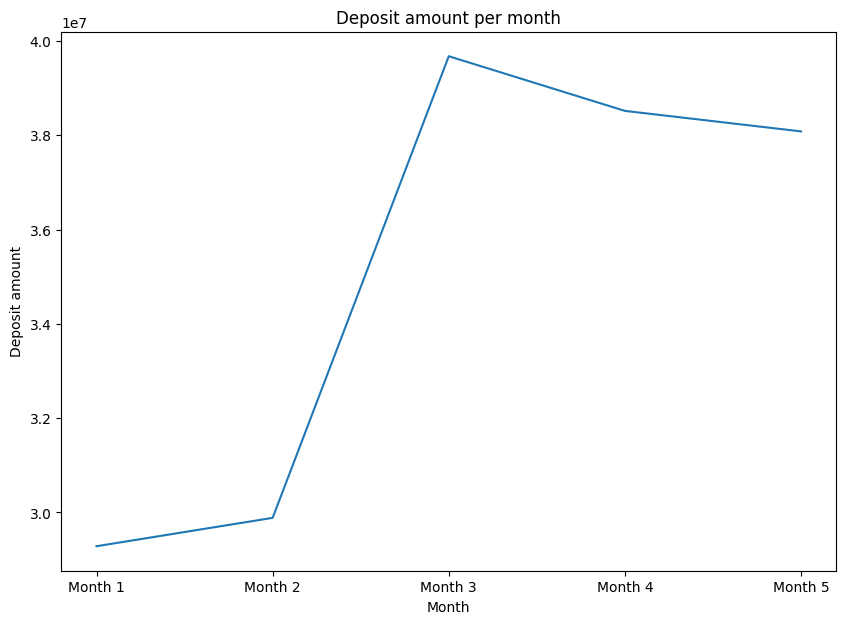

In [22]:
deposit_amount_by_month = df.groupby(by=df["month_name"])["deposit_amount"].sum()

print(deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount per month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

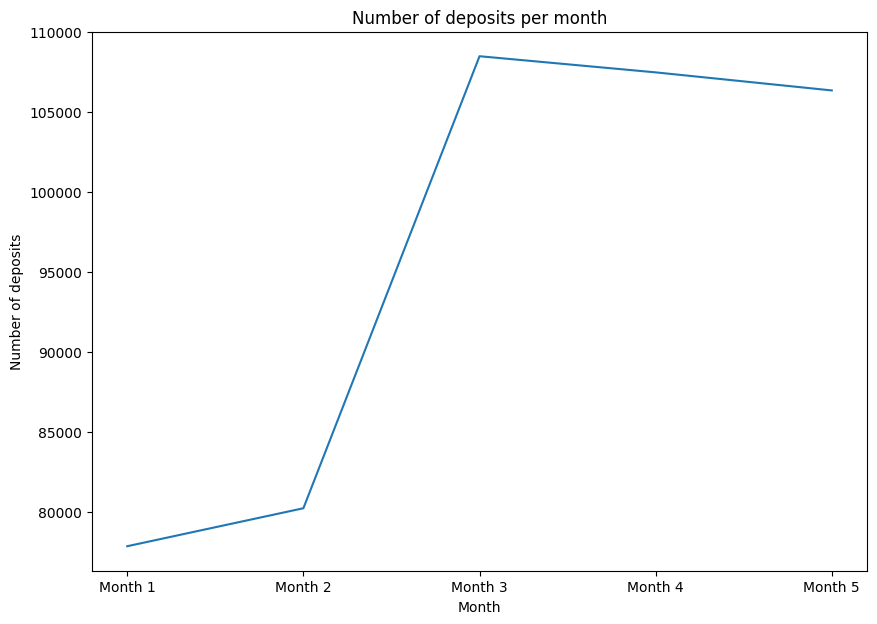

In [23]:
number_of_deposits_by_month = df.groupby(by=df["month_name"]).size()

_ = plt.plot(number_of_deposits_by_month)

_ = plt.title("Number of deposits per month")
_ = plt.ylabel("Number of deposits")
_ = plt.xlabel("Month")

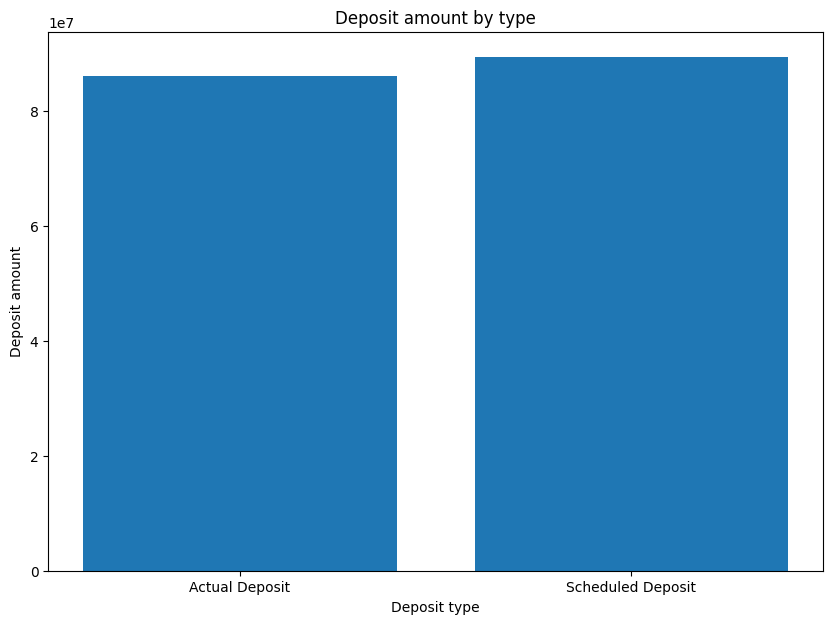

In [24]:
deposit_amount_by_type = df.groupby(by=df["deposit_type"])["deposit_amount"].sum()


_ = plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)

_ = plt.title("Deposit amount by type")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit type")

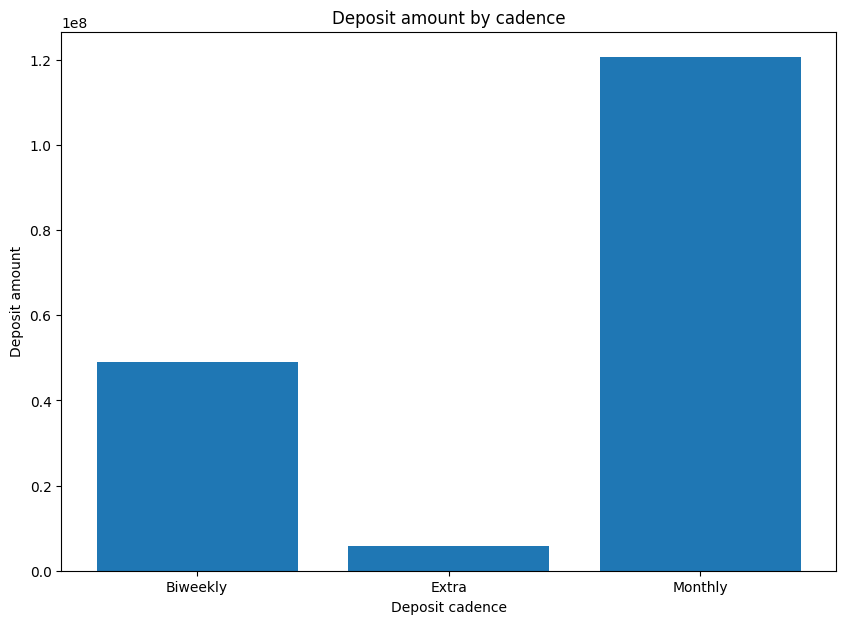

In [25]:
deposit_amount_by_cadence = df.groupby(by=df["deposit_cadence"])["deposit_amount"].sum()


_ = plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)

_ = plt.title("Deposit amount by cadence")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit cadence")

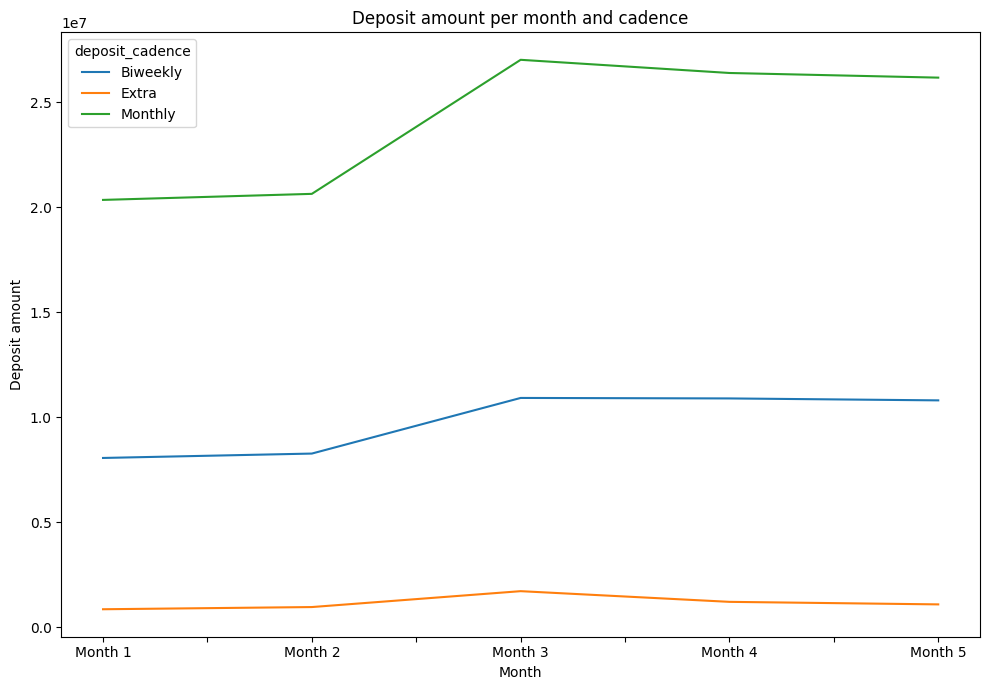

In [26]:
tmp_df = df.groupby(by=[df["deposit_cadence"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

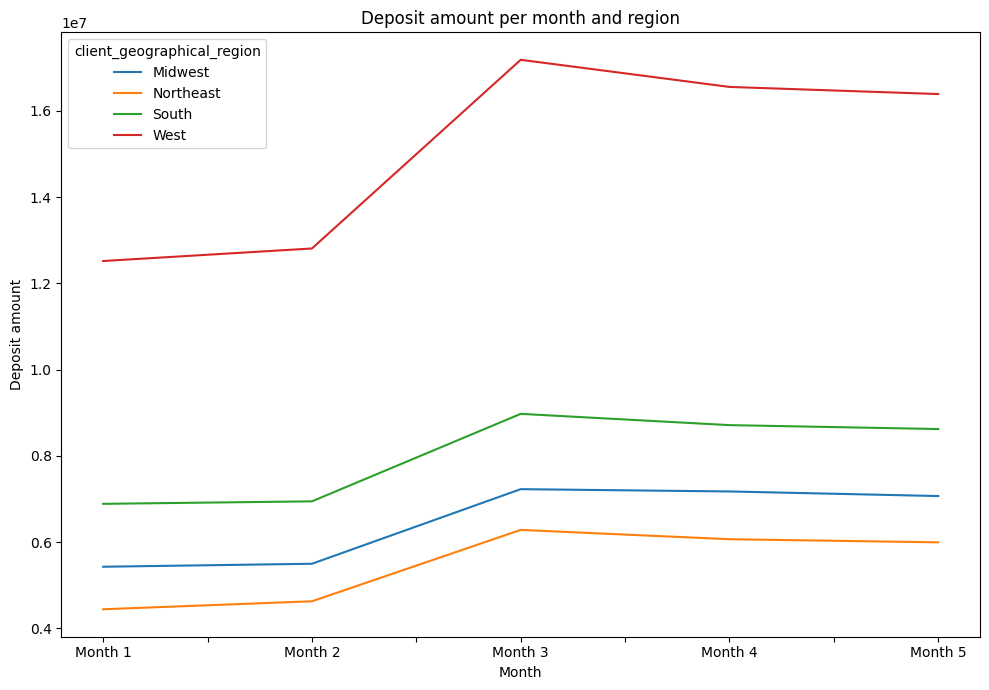

In [27]:
tmp_df = df.groupby(by=[df["client_geographical_region"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and region")
plt.tight_layout()

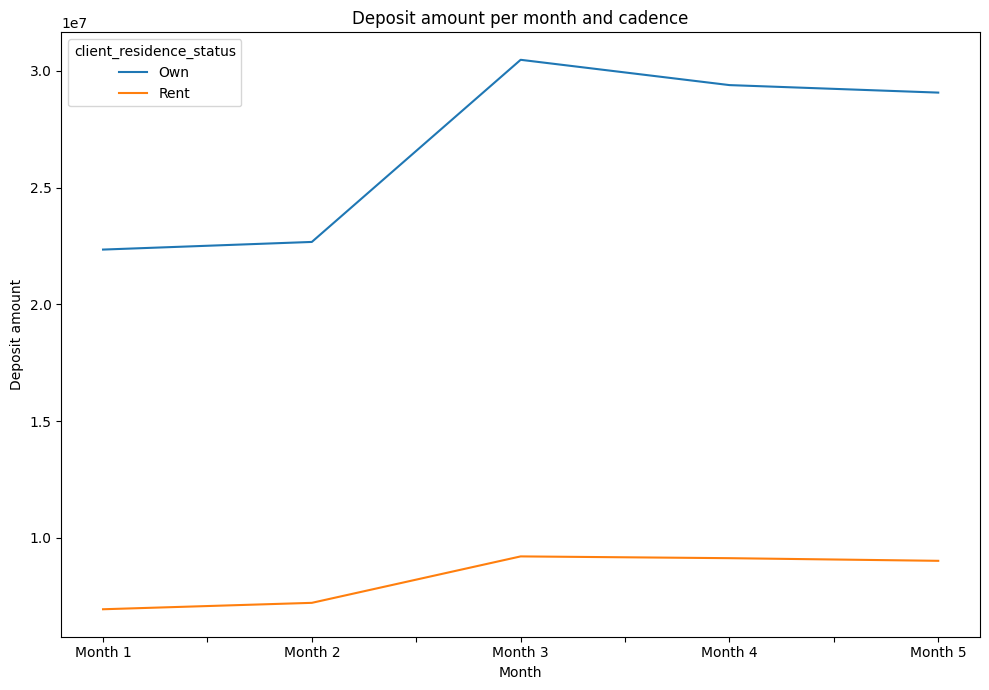

In [28]:
tmp_df = df.groupby(by=[df["client_residence_status"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()


Question 1
Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

In [29]:
clients_before_campaign = df[(df["month_name"] == "Month 1")
                           | (df["month_name"] == "Month 2")]["client_id"].unique()
clients_before_campaign.shape

(34051,)

In [30]:
clients_during_campaign = df[(df["month_name"] == "Month 3")]["client_id"].unique()
clients_during_campaign.shape

(43806,)

In [31]:
clients_after_campaign = df[(df["month_name"] == "Month 4")
                          | (df["month_name"] == "Month 5")]["client_id"].unique()
clients_after_campaign.shape

(41862,)

Question: How many new clients were acquired while the ad campaign was running?

In [32]:
len(set(clients_during_campaign).difference(set(clients_before_campaign)))

11544

Question: How many after the campaign?

In [33]:
len(
    set(clients_after_campaign).difference(set(clients_before_campaign).union(set(clients_during_campaign)))
)

752

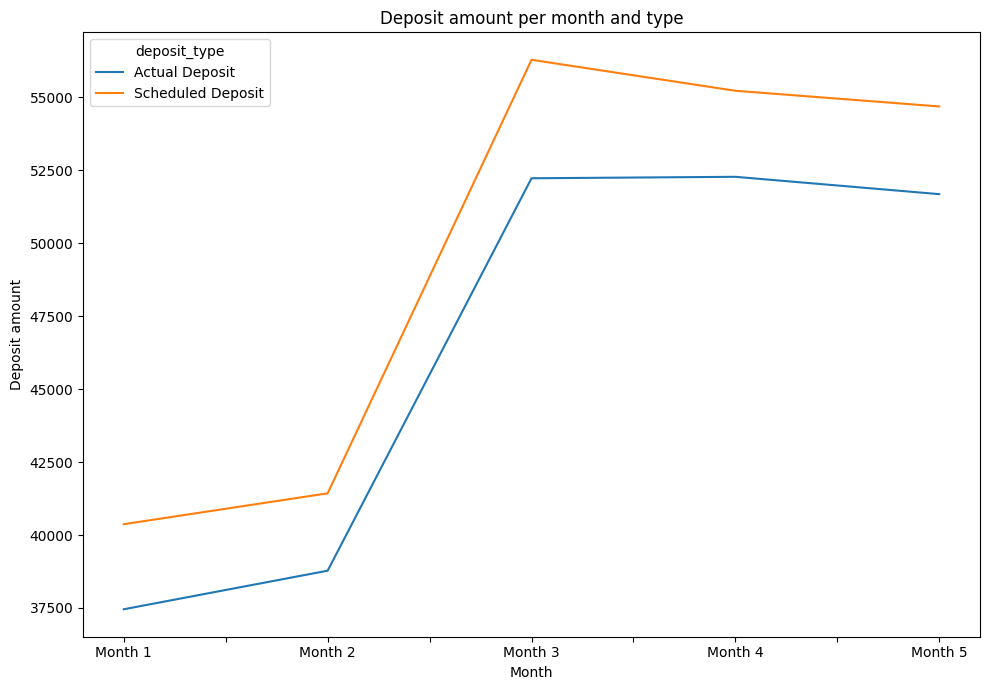

In [34]:
temp_df = df.groupby(by=[df["deposit_type"], df["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

As expected, this plot very closely matches the distributions of the plots in the analysis section. During the ad campaign, the number of actual and scheduled deposits increases for 25%, or 10K transactions, and while it gradually decreases in the next two months, it still remains very high, at above 50K deposits per type each, while the pre-campaign levels were at around 40K.

Question 2
Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

Almost all of the plots show similar patterns through time and it is difficult to make any suggestions.

One thing that could be explored more is targeted marketing. We notice that most of the people in the data are middle-aged (40-60 years) and most of them are home owners. We can observe this in the age histogram and the count per residence status in the EDA section.

In the next plot, we will show the deposit amount changing through time and age group (age divided by 10).

In [35]:
def discretize_age(row):
    return int(row.client_age / 10)

dff = df.copy(deep=True)
dff["age_group"] = dff.apply(discretize_age, axis=1)
dff


,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2,2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2,2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2,8
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2,8
...,...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,Month 2,8
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,Month 2,8
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,Month 2,8
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,Month 2,8


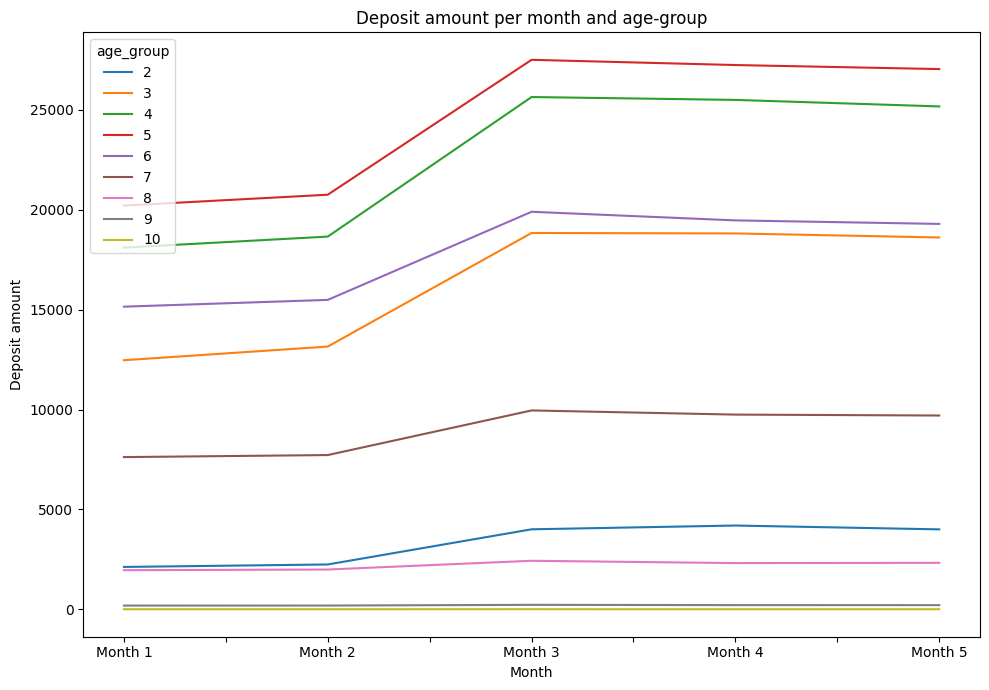

In [36]:
tmp_df = dff.groupby(by=[dff["age_group"], dff["month_name"]]).size()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and age-group")
plt.tight_layout()

We observe big increase in middle-aged customers and little to no increase in very young or very old customers. In the following analysis, we focus on the middle-aged sub-group of customers. We think that better engagement with them could result in more deposits.

In [37]:
df_q2 = df[(df["client_residence_status"] == "Own")
         & (df["client_age"] <= 60)
         & (df["client_age"] >= 40)]
df_q2.shape

(181068, 9)

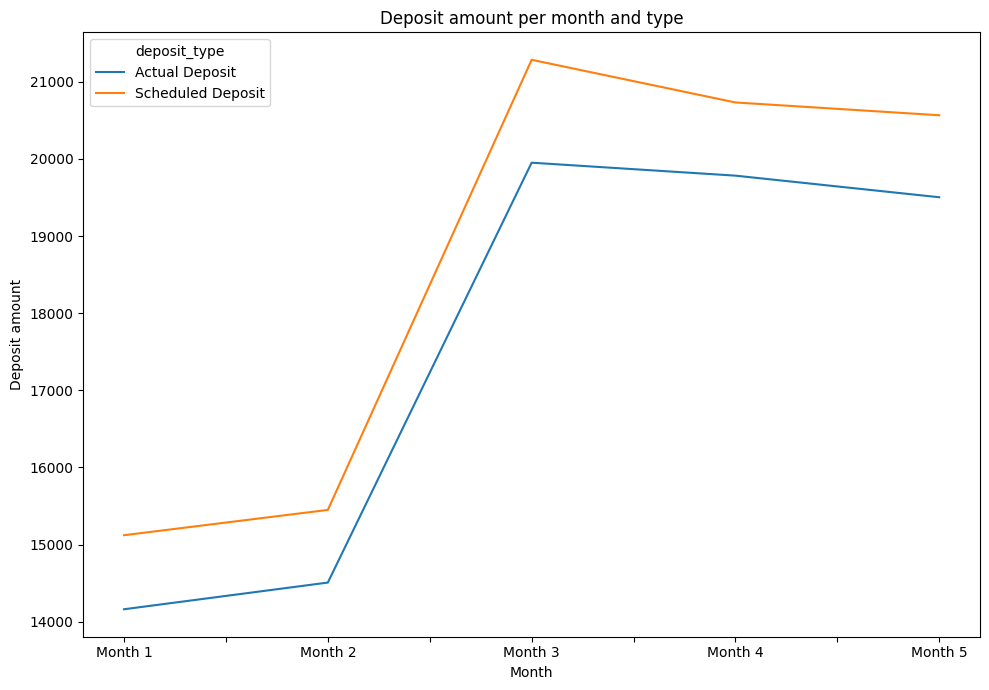

In [38]:
temp_df = df_q2.groupby(by=[df_q2["deposit_type"], df_q2["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

This sub-group of customers is responsible for 42% of the extra deposit amount, and yet represents only 37% of clients.

In [39]:
extra_deposit_df_q2 = df_q2[df_q2["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
extra_deposit_df = df[df["deposit_cadence"] == "Extra"]["deposit_amount"].sum()

extra_deposit_df_q2 / extra_deposit_df

0.4234867523021417

In [40]:
df_q2.shape[0] / df.shape[0]

0.3769156150992727

We can further explore the extra deposits to identify client groups that are of interest.

In [41]:
df[df["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

West         3570
South        1991
Midwest      1486
Northeast    1300
Name: client_geographical_region, dtype: int64

In [42]:
df[df["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

Own     5856
Rent    2491
Name: client_residence_status, dtype: int64

In [43]:
df[df["deposit_cadence"] == "Extra"]["month_name"].value_counts()

Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: month_name, dtype: int64

Some key points based on the previous cells:

Most extra deposits are observed in the West region as expected. This distribution closely matches the distribution of other deposit types as well
Clients who own their residence are approx. 2.33 times as likely to deposit extra amount than clients who rent their residence
Most extra deposits are observed in Month 3, when the campaign was running. Post-campaign numbers for extra deposits are 33% higher than pre-campaign.

Question 3
How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

One way we can simulate the postponement of the campaign is to "postpone" the deposits coming from new clients who were acquired during the third month. We (strongly) assume that the clients who made their first deposit in the third month in the data set are acquired due to the campaign; this is not necessarily correct, but for the sake of the exercise we can treat it as if it were.

Technically speaking, this means we should take the following steps.

Identify which clients made their first deposit in the third month, i.e., were acquired because of the campaign. (we have already done that in previous sections)
Postpone their deposits until after the fifth month, i.e., add exactly three months to the date of their deposit.
Re-run the same analyses from Question 1 and make summarise the difference in the results.

In [44]:
df_copy = df.copy(deep=True)

In [45]:
new_clients = set(clients_during_campaign).difference(set(clients_before_campaign))

In [46]:
import datetime

def simulate_campaign_postponement(row):
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == "Month 3":
            row.month_name = "Month 6"
        elif row.month_name == "Month 4":
            row.month_name = "Month 7"
        elif row.month_name == "Month 5":
            row.month_name = "Month 8"
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row

df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

In [47]:
df_copy["deposit_date"].max()

Timestamp('2020-01-29 00:00:00')

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    30002419.69
Month 4    27306769.25
Month 5    28138150.45
Month 6     9672637.41
Month 7    11209050.48
Month 8     9943024.78
Name: deposit_amount, dtype: float64


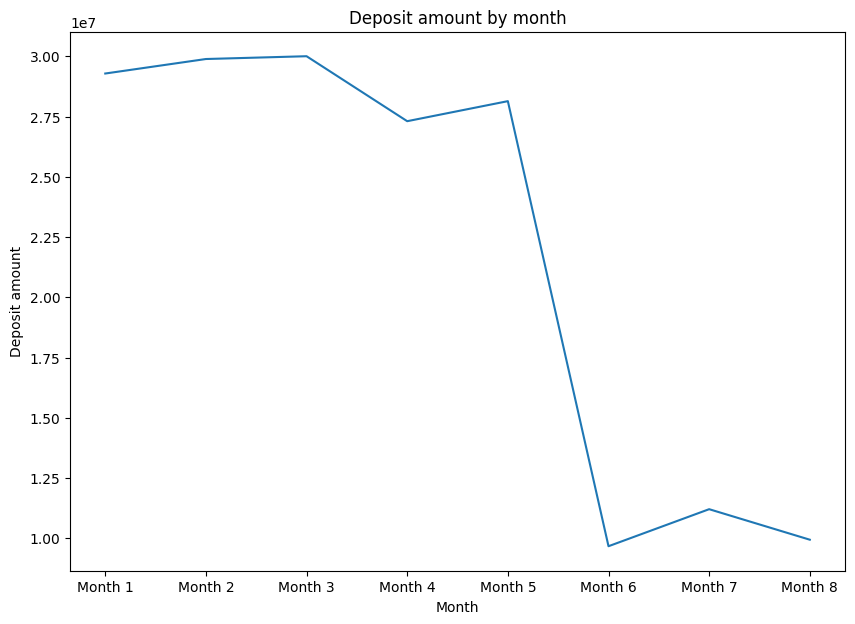

In [48]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The plots look a bit weird, because in months 6, 7, and 8 we have only the data coming from the new customers, and this is going to be much lower than usual.

To simulate the deposits coming from the existing customers, we can simply add an average deposit amount from the previous months.

In [49]:
avg_monthly_deposit = (df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()).mean()

In [50]:
avg_monthly_deposit

21930414.27375

month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


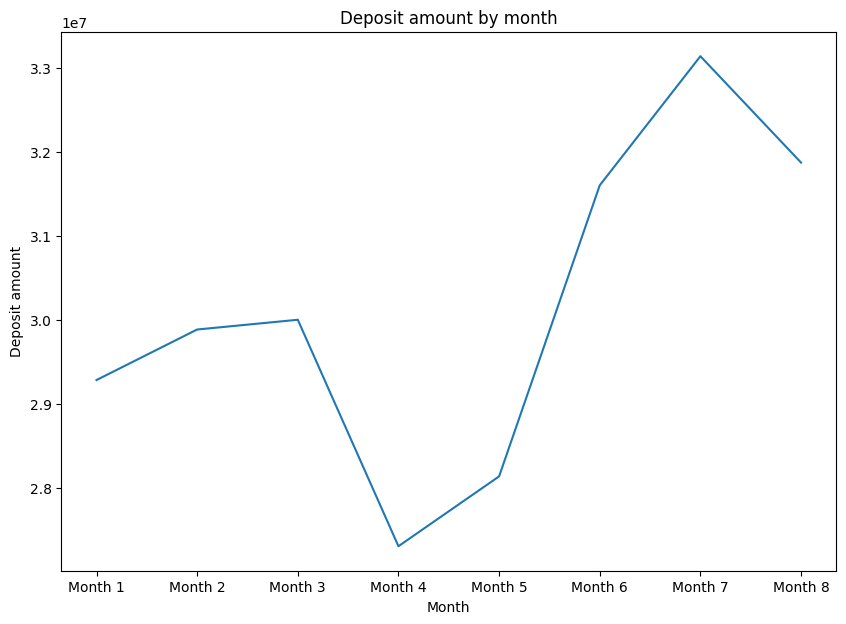

In [51]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()


deposit_amount_by_month.at["Month 6"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 7"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 8"] += avg_monthly_deposit

print(deposit_amount_by_month)


_ = plt.plot(deposit_amount_by_month)

_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The simulation shows quite an increase in deposits. Following are some key points to summarise the difference from the answer provided in Question 1.

During the month the campaign was running, Freedom Debt Relief received almost $2.5    million  increase in deposit amounts than previous months, compared to $10 million in Question 1.

In the month following the campaign, the total deposit amount continues to increase to reach its maximum at $33 million. In the last month, it drops to $31 million but remains on a higher level than pre-campaign.

The cost of the campaign was $5 million, and the incurred deposit amount increased by a total of $8 million. In Question 1 this number was much higher: $26 million, and we determined that that was borderline profitable. So, $8 million is much lower, and we conclude that postponing the campaign would have not been the right choice.